# Exploratory Data Analysis (EDA) en el esquema "RAW" de Snowflake

En este notebook, realizaremos un análisis exploratorio de datos (EDA) sobre las tablas en el esquema "RAW" de nuestra base de datos en **Snowflake**. Este análisis incluye la inspección de las tablas, estadísticas descriptivas, distribución de variables numéricas y algunos gráficos.

---

## 1. Conexión a Snowflake

Primero, nos conectaremos a Snowflake para obtener los datos de las tablas del esquema "RAW" que vamos a analizar.



In [64]:
import yaml
import snowflake.connector
import os
import pandas as pd

# Function to load Snowflake credentials from YAML file
def load_snowflake_credentials(yaml_path):
    with open(yaml_path, 'r') as file:
        config = yaml.safe_load(file)

    if 'default' not in config:
        raise KeyError("❌ Missing 'default' key in YAML file. Check the structure.")

    return {
        'user': config['default']['SNOWFLAKE_USER'],
        'password': config['default']['SNOWFLAKE_PASSWORD'],
        'account': config['default']['SNOWFLAKE_ACCOUNT']
    }

# Path to the config.yaml file (one directory level up from the script)
yaml_path = os.path.join(os.getcwd(), '..', 'snowflake.yaml')  

# Load the credentials from the YAML file
credentials = load_snowflake_credentials(yaml_path)

# Function to create Snowflake connection using the loaded credentials
def create_snowflake_connection(credentials):
    conn = snowflake.connector.connect(
        user=credentials['user'],
        password=credentials['password'],
        account=credentials['account'],
        database="INSTACART_DB",
        schema="RAW"
    )
    return conn

# Create the Snowflake connection
conn = create_snowflake_connection(credentials)

# Verify that the connection is successful
print("Conexión exitosa a Snowflake")


Conexión exitosa a Snowflake


In [30]:
query = "SHOW TABLES IN SCHEMA RAW;"
tables_df = pd.read_sql(query, conn)
print("Tablas disponibles en RAW:")
display(tables_df[['name']])

/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/1765069338.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql(query, conn)


Tablas disponibles en RAW:


,name
0,AISLES
1,DEPARTMENTS
2,ORDERS
3,ORDER_PRODUCTS
4,PRODUCTS


In [31]:
def get_table_dimensions(table_name):
    query = f"SELECT COUNT(*) AS num_rows FROM RAW.{table_name};"
    num_rows = pd.read_sql(query, conn)['NUM_ROWS'][0] 

    query = f"SELECT COUNT(*) AS num_columns FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_SCHEMA = 'RAW' AND TABLE_NAME = '{table_name}';"
    num_columns = pd.read_sql(query, conn)['NUM_COLUMNS'][0]  
    return table_name, num_rows, num_columns
table_names = tables_df['name'].tolist()
dimensions = [get_table_dimensions(table) for table in table_names]
df_dimensions = pd.DataFrame(dimensions, columns=['Table', 'Rows', 'Columns'])

# Mostrar resultados
print(df_dimensions)

/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/3549740270.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_rows = pd.read_sql(query, conn)['NUM_ROWS'][0]
/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/3549740270.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_columns = pd.read_sql(query, conn)['NUM_COLUMNS'][0]


            Table     Rows  Columns
0          AISLES      134        2
1     DEPARTMENTS       21        2
2          ORDERS   478967        7
3  ORDER_PRODUCTS  4545007        4
4        PRODUCTS    49694        4


/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql(query_tables, conn)



--- Análisis de la tabla: ORDER_PRODUCTS ---



/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_rows = pd.read_sql(query_dim, conn)['TOTAL_ROWS'][0]
/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_columns = pd.read_sql(query_cols, conn)['TOTAL_COLUMNS'][0]


Dimensión: 4545007 filas, 4 columnas


/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_stats, conn)



Estadísticas descriptivas:
          order_id    product_id  add_to_cart_order     reordered
count  10000.0000  10000.000000       10000.000000  10000.000000
mean    3633.7824  25521.472500           8.355900      0.581900
std     2158.3759  14049.120556           6.989343      0.493271
min        4.0000     25.000000           1.000000      0.000000
25%     1678.0000  13535.000000           3.000000      0.000000
50%     3615.0000  25149.000000           6.000000      1.000000
75%     5452.0000  37742.000000          12.000000      1.000000
max     7251.0000  49683.000000          52.000000      1.000000


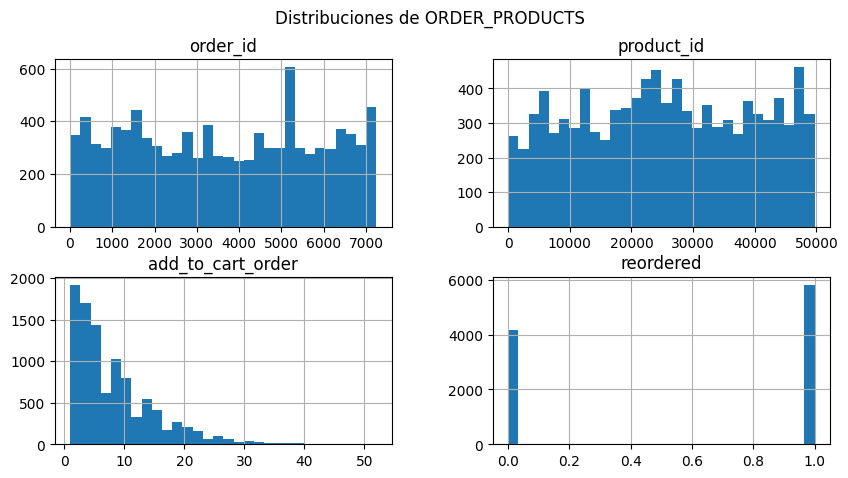


Valores nulos por columna:
 Series([], dtype: int64)

Registros duplicados: 0


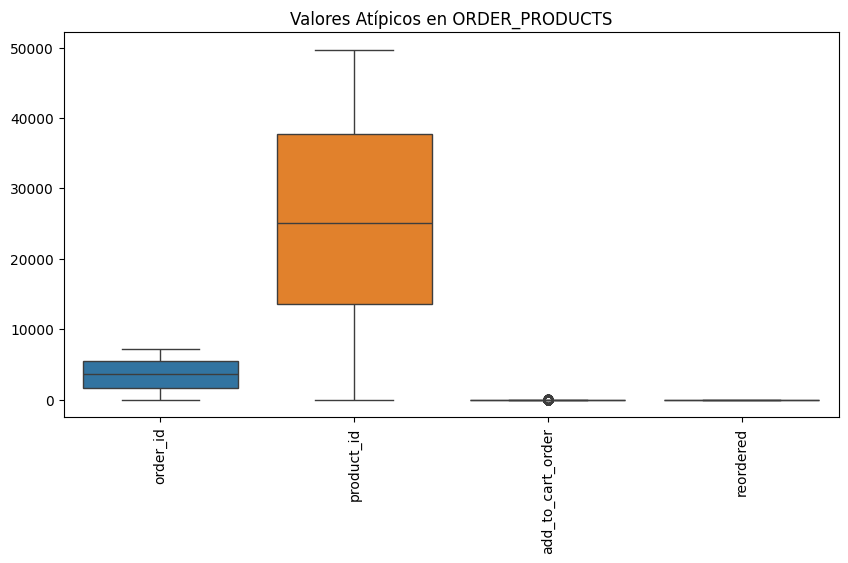


--- Análisis de la tabla: AISLES ---



/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_rows = pd.read_sql(query_dim, conn)['TOTAL_ROWS'][0]
/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_columns = pd.read_sql(query_cols, conn)['TOTAL_COLUMNS'][0]


Dimensión: 134 filas, 2 columnas


/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_stats, conn)



Estadísticas descriptivas:
          aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000


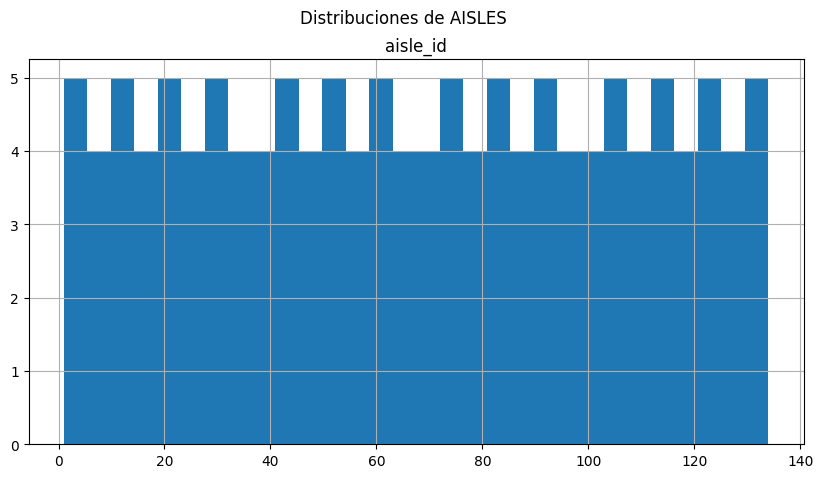


Valores nulos por columna:
 Series([], dtype: int64)

Registros duplicados: 0


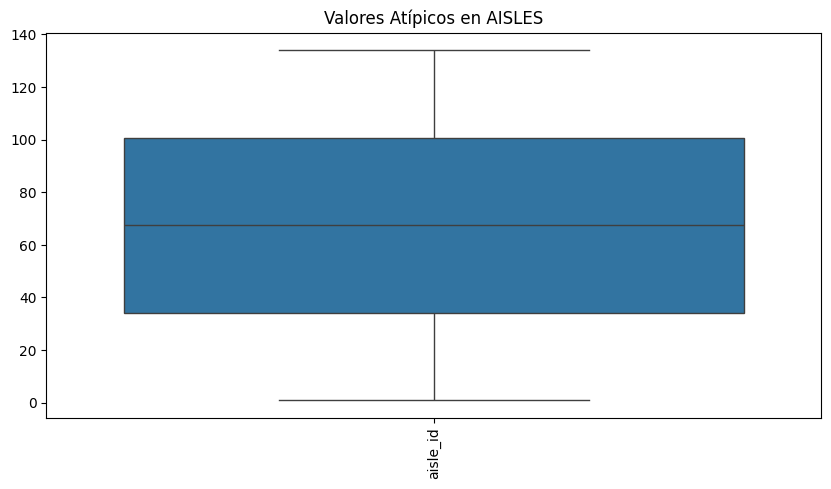


--- Análisis de la tabla: DEPARTMENTS ---



/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_rows = pd.read_sql(query_dim, conn)['TOTAL_ROWS'][0]
/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_columns = pd.read_sql(query_cols, conn)['TOTAL_COLUMNS'][0]


Dimensión: 21 filas, 2 columnas


/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_stats, conn)



Estadísticas descriptivas:
        department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000


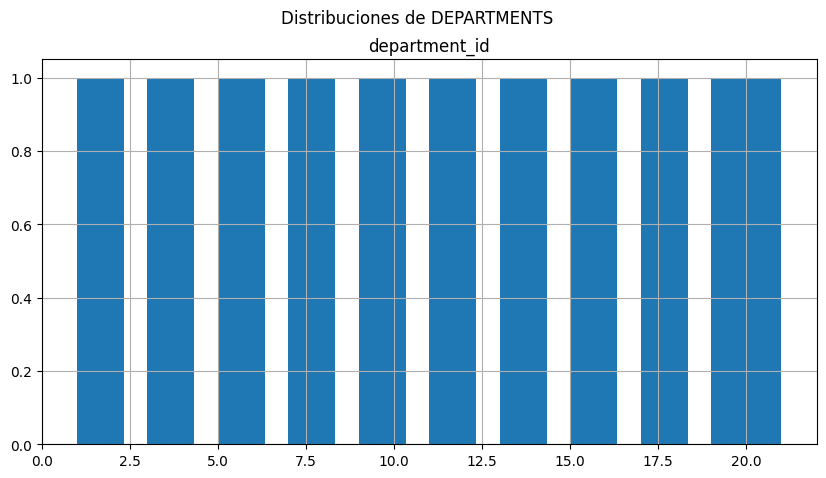


Valores nulos por columna:
 Series([], dtype: int64)

Registros duplicados: 0


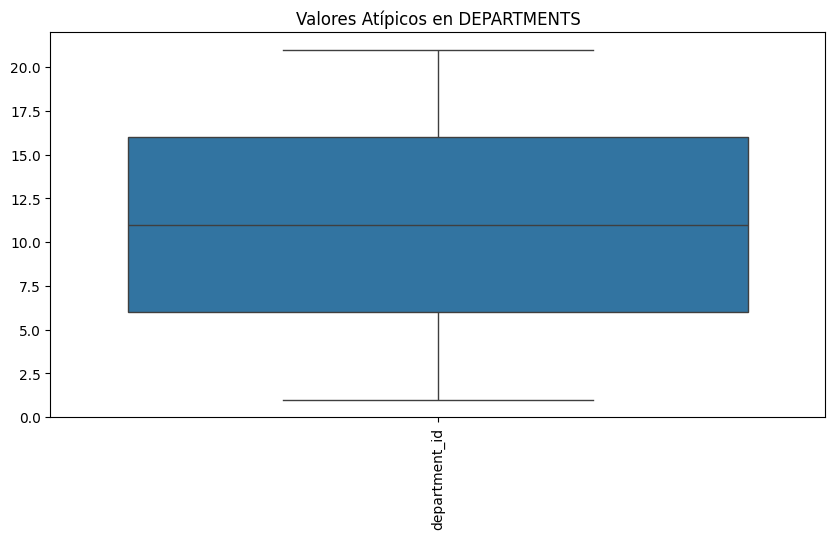


--- Análisis de la tabla: ORDERS ---



/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_rows = pd.read_sql(query_dim, conn)['TOTAL_ROWS'][0]
/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_columns = pd.read_sql(query_cols, conn)['TOTAL_COLUMNS'][0]


Dimensión: 478967 filas, 7 columnas


/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_stats, conn)



Estadísticas descriptivas:
                 id      order_id        user_id  order_number     order_dow  \
count  10000.00000  1.000000e+04   10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.722616e+06  103151.701700     17.102300      2.773900   
std     2886.89568  9.830459e+05   59176.817459     17.878059      2.053485   
min        1.00000  6.960000e+02      17.000000      1.000000      0.000000   
25%     2500.75000  8.869798e+05   52216.250000      5.000000      1.000000   
50%     5000.50000  1.720052e+06  101802.500000     10.000000      3.000000   
75%     7500.25000  2.585098e+06  153992.500000     23.000000      5.000000   
max    10000.00000  3.420684e+06  206206.000000    100.000000      6.000000   

       order_hour_of_day  days_since_prior_order  
count       10000.000000             9385.000000  
mean           13.474600               11.166329  
std             4.218523                9.177940  
min             0.000000                0.000000  
25% 

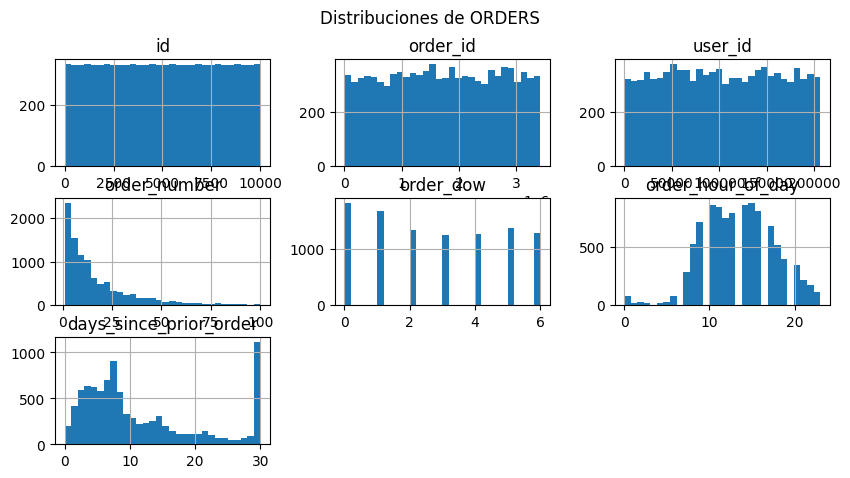


Valores nulos por columna:
 days_since_prior_order    615
dtype: int64

Registros duplicados: 0


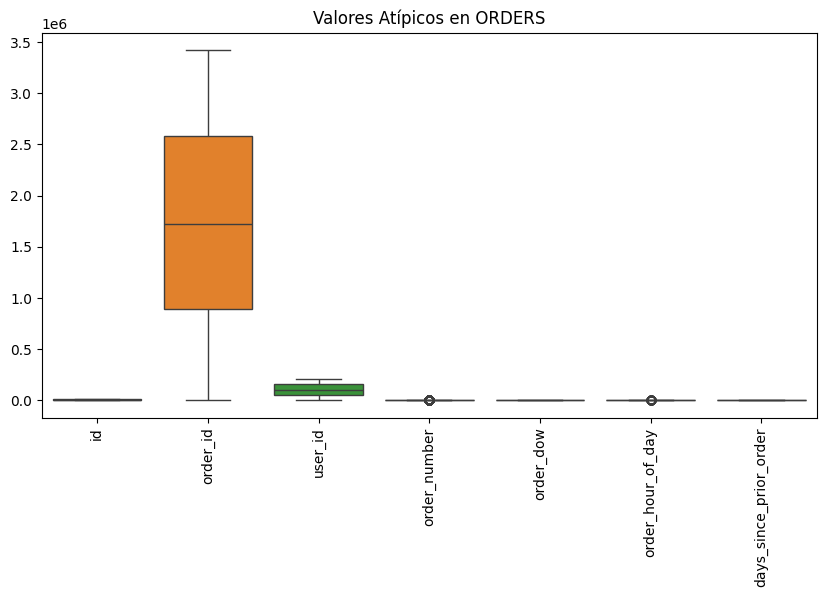


--- Análisis de la tabla: PRODUCTS ---



/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_rows = pd.read_sql(query_dim, conn)['TOTAL_ROWS'][0]
/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_columns = pd.read_sql(query_cols, conn)['TOTAL_COLUMNS'][0]


Dimensión: 49694 filas, 4 columnas


/var/folders/bw/_sg2t27140qgsjyxv1gr3nyc0000gn/T/ipykernel_73925/947799493.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_stats, conn)



Estadísticas descriptivas:
         product_id     aisle_id  department_id
count  10000.00000  10000.00000   10000.000000
mean    5000.50000     68.56070      11.661700
std     2886.89568     38.13101       5.876266
min        1.00000      1.00000       1.000000
25%     2500.75000     37.00000       7.000000
50%     5000.50000     72.00000      13.000000
75%     7500.25000    100.00000      17.000000
max    10000.00000    134.00000      21.000000


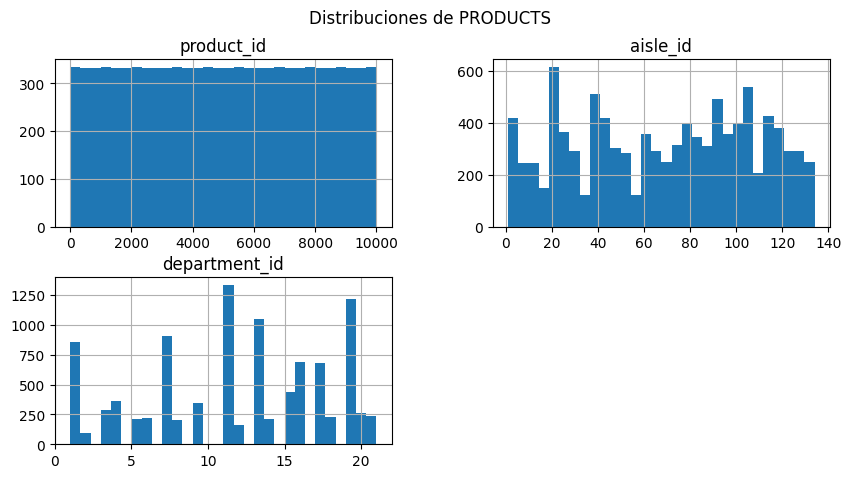


Valores nulos por columna:
 product_name    240
dtype: int64

Registros duplicados: 0


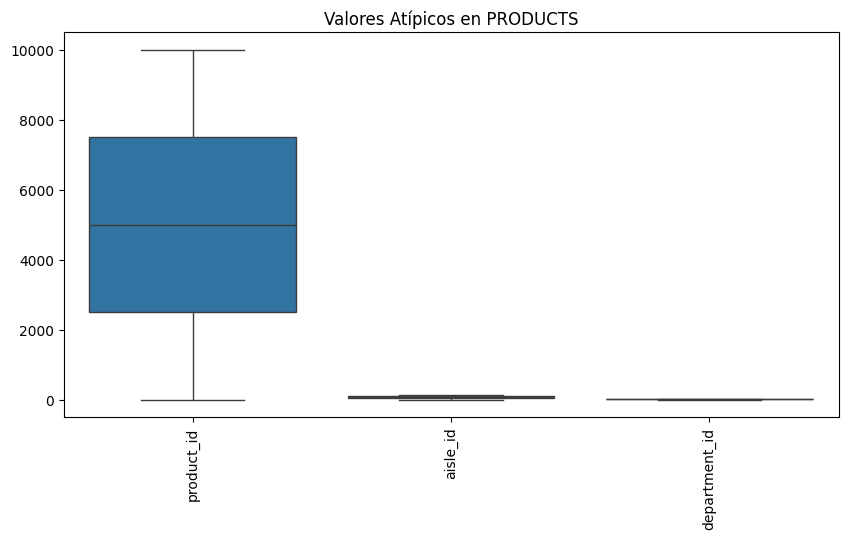

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener lista de tablas en el esquema RAW
query_tables = """
SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'RAW';
"""
tables_df = pd.read_sql(query_tables, conn)
table_names = tables_df['TABLE_NAME'].tolist()

# Exploración de cada tabla
for table in table_names:
    print(f"\n--- Análisis de la tabla: {table} ---\n")
    
    # Obtener la cantidad de filas y columnas
    query_dim = f"SELECT COUNT(*) AS total_rows FROM RAW.{table};"
    total_rows = pd.read_sql(query_dim, conn)['TOTAL_ROWS'][0]
    query_cols = f"SELECT COUNT(*) AS total_columns FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table}' AND TABLE_SCHEMA = 'RAW';"
    total_columns = pd.read_sql(query_cols, conn)['TOTAL_COLUMNS'][0]
    print(f"Dimensión: {total_rows} filas, {total_columns} columnas")
    
    # Obtener estadísticas descriptivas básicas
    query_stats = f"SELECT * FROM RAW.{table} LIMIT 10000;"
    df = pd.read_sql(query_stats, conn)
    print("\nEstadísticas descriptivas:\n", df.describe())
    
    # Histograma de variables numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns
    if not numeric_cols.empty:
        df[numeric_cols].hist(figsize=(10, 5), bins=30)
        plt.suptitle(f"Distribuciones de {table}")
        plt.show()
    
    # Detectar valores nulos
    missing_values = df.isnull().sum()
    print("\nValores nulos por columna:\n", missing_values[missing_values > 0])
    
    # Detectar registros duplicados
    duplicates = df.duplicated().sum()
    print(f"\nRegistros duplicados: {duplicates}")
    
    # Identificación de valores atípicos con boxplot
    if not numeric_cols.empty:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df[numeric_cols])
        plt.xticks(rotation=90)
        plt.title(f"Valores Atípicos en {table}")
        plt.show()

# Cerrar conexión
conn.close()
